In [17]:
import tensorflow as tf
import os 
import pandas as pd
import numpy as np

In [18]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [19]:
df = pd.read_csv(csv_path)

In [20]:
df = df[5::6]
df.head

<bound method NDFrame.head of                   Date Time  p (mbar)  ...  max. wv (m/s)  wd (deg)
5       01.01.2009 01:00:00    996.50  ...           0.63     192.7
11      01.01.2009 02:00:00    996.62  ...           0.63     190.3
17      01.01.2009 03:00:00    996.84  ...           0.63     167.2
23      01.01.2009 04:00:00    996.99  ...           0.38     240.0
29      01.01.2009 05:00:00    997.46  ...           0.88     157.0
...                     ...       ...  ...            ...       ...
420521  31.12.2016 19:10:00   1002.18  ...           1.36     190.6
420527  31.12.2016 20:10:00   1001.40  ...           1.92     225.4
420533  31.12.2016 21:10:00   1001.19  ...           1.56     158.7
420539  31.12.2016 22:10:00   1000.65  ...           0.68     216.7
420545  31.12.2016 23:10:00   1000.11  ...           1.00     202.6

[70091 rows x 15 columns]>

In [21]:
df.indix = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

C:\Users\DUC_AN\AppData\Local\Temp\ipykernel_11924\1211928593.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.indix = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')


<Axes: >

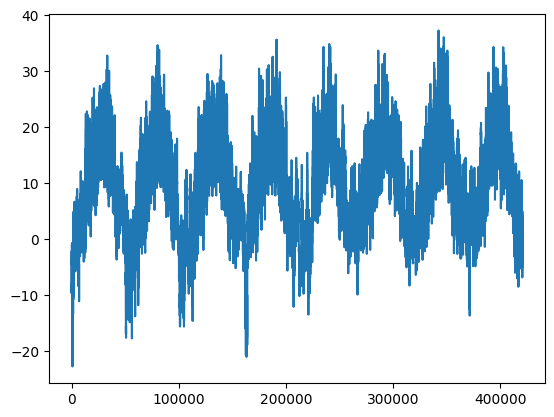

In [22]:
temp = df['T (degC)']
temp.plot()

In [23]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [24]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)

In [25]:
X.shape, y.shape

((70086, 5, 1), (70086,))

In [26]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(128))
model1.add(Dense(8,'rel u'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 8)                 1032      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 67,601
Trainable params: 67,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [38]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 17.3181 - root_mean_squared_error: 4.1615

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 9ms/step - loss: 17.2589 - root_mean_squared_error: 4.1544 - val_loss: 1.2622 - val_root_mean_squared_error: 1.1235
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.4588 - root_mean_squared_error: 1.2078

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 14s 8ms/step - loss: 1.4576 - root_mean_squared_error: 1.2073 - val_loss: 0.6056 - val_root_mean_squared_error: 0.7782
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7974 - root_mean_squared_error: 0.8930

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.7974 - root_mean_squared_error: 0.8930 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7183
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.6904 - root_mean_squared_error: 0.8309

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.6916 - root_mean_squared_error: 0.8316 - val_loss: 0.5083 - val_root_mean_squared_error: 0.7130
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6698 - root_mean_squared_error: 0.8184 - val_loss: 0.5111 - val_root_mean_squared_error: 0.7149
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6600 - root_mean_squared_error: 0.8124

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.6597 - root_mean_squared_error: 0.8122 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6548 - root_mean_squared_error: 0.8092 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7106
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6512 - root_mean_squared_error: 0.8069

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 0.4931 - val_root_mean_squared_error: 0.7022
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6463 - root_mean_squared_error: 0.8039

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.6468 - root_mean_squared_error: 0.8043 - val_loss: 0.4901 - val_root_mean_squared_error: 0.7001
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6464 - root_mean_squared_error: 0.8040 - val_loss: 0.5133 - val_root_mean_squared_error: 0.7165


In [39]:
from keras.models import load_model
model1 = load_model('model1/')

In [40]:
train_predictions = model1.predict(X_train).flatten()
train_result = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals': y_train})
train_result

1875/1875 [==============================] - 8s 4ms/step


,Train Predictions,Actuals
0,-9.858301,-9.67
1,-9.706313,-9.17
2,-8.806678,-8.10
3,-7.276116,-7.66
4,-7.154182,-7.04
...,...,...
59995,6.248050,6.07
59996,7.201573,9.88
59997,11.730238,13.53
59998,15.618155,15.43


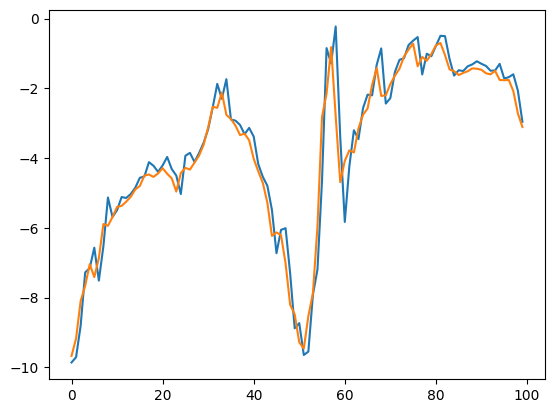

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_result['Train Predictions'][:100])
plt.plot(train_result['Actuals'][:100])